<a href="https://colab.research.google.com/github/rajneeshanand/pytorch_RJ/blob/main/Tensor_math_and_basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [3]:
tensor_a+tensor_b

tensor([ 6,  8, 10, 12])

In [4]:
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [5]:
tensor_a-tensor_b

tensor([-4, -4, -4, -4])

In [6]:
tensor_a*tensor_b

tensor([ 5, 12, 21, 32])

In [7]:
tensor_a/tensor_b

tensor([0.2000, 0.3333, 0.4286, 0.5000])

In [8]:
tensor_b%tensor_a

tensor([0, 0, 1, 0])

In [9]:
#exponents/power

torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [10]:
#Reassignment

tensor_a+tensor_b

tensor([ 6,  8, 10, 12])

In [13]:
#tensor_a = tensor_a+tensor_b
tensor_a.add_(tensor_b)
#tensor_a

tensor([16, 20, 24, 28])

**CREATE A BASIC NEURAL NETWORK**

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
#create a model class that inherits nn.module

class Model(nn.Module):
  #input layer (4 features of the flower)
  #--> hideen layer 1 (# of neurons)--> h2 (n) --> output(3 classes of iris)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  #initiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [46]:
# pack a manual seed for randomization
torch.manual_seed(41)

model = Model()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [49]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
#change last column strings to numbers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head()

/tmp/ipython-input-507876005.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [51]:
# Train_test_split

X = my_df.drop('species', axis=1)
y = my_df['species']

In [52]:
#convert these into numpy arrays
X = X.values
y= y.values

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)


In [56]:
#convert x features into tensors
X_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(x_test)

In [57]:
#convert y features into long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [58]:
#set the criteria to meaasure the error, how far predictors are from data
criterion = nn.CrossEntropyLoss()

#chose ADAM optimizer, lr =learning rate
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)


In [60]:
#Train the model
#epochs? (one run thru all the training data in network)
epochs =100
losses = []
for i in range(epochs):
  #go forward and get predict
  y_pred = model.forward(X_train)  #get predicted results

  #measure loss/error, gonna be high initially
  loss = criterion(y_pred, y_train)

  #keep track of the losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print(f'Epoch:{i} and loss: {loss}')

  #do some back prop: take the error rate of forward propagation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch:0 and loss: 1.1251550912857056
Epoch:10 and loss: 1.0096259117126465
Epoch:20 and loss: 0.8157405853271484
Epoch:30 and loss: 0.585706353187561
Epoch:40 and loss: 0.3999636471271515
Epoch:50 and loss: 0.2676880657672882
Epoch:60 and loss: 0.17942363023757935
Epoch:70 and loss: 0.12151690572500229
Epoch:80 and loss: 0.0860118418931961
Epoch:90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

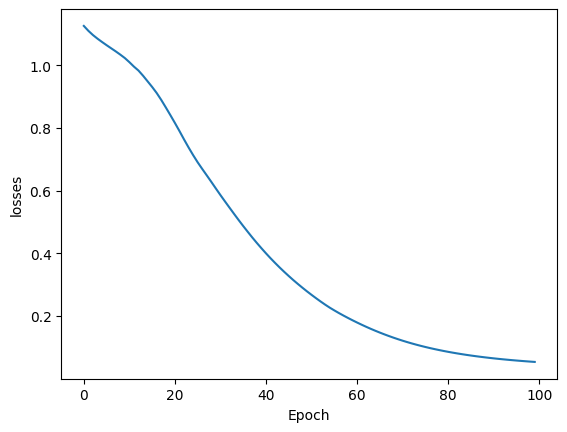

In [61]:
#graph it out

plt.plot(range(epochs), losses)
plt.ylabel("losses")
plt.xlabel('Epoch')

**Evaluate model on test data set (validate model on test set)**

In [62]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test) #find the loss/eror

In [76]:
loss

tensor(0.1315)

In [75]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] ==0:
      x = 'setosa'
    elif y_test[i] ==1:
      x = 'versicolor'
    else:
      x = 'verginica'

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct!')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4527, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [77]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [78]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [79]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [80]:
newer_irsi =torch.tensor([5.9,3.0,5.1,1.8])

In [81]:
with torch.no_grad():
  print(model(newer_irsi))

tensor([-5.9944,  4.5077,  6.6792])
